In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
daily = pd.read_csv('daily_sales.csv')
month = pd.read_csv('monthly_sales.csv')

In [3]:
daily.head()

,Unnamed: 0,Day,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
0,Friday,1/1/2016,37240,16077,8446,39249,16565,10204,37271,16819,9924,35967,13955,11734,35689,13499,11232
1,Saturday,1/2/2016,36258,14726,7950,38106,14003,7316,35021,14705,9028,36398,15089,8005,37178,14256,9152
2,Sunday,1/3/2016,37007,15103,8397,35494,15987,8683,35369,16591,8105,34864,13919,7011,35855,15557,8406
3,Monday,1/4/2016,37590,16413,9537,33666,15114,8429,37993,14535,8034,36601,14528,8201,36168,15699,7940
4,Tuesday,1/5/2016,38036,16199,10123,33528,13721,10085,37854,14590,9879,36661,15132,8874,36837,15420,8607


In [4]:
month.tail()

,"Month, Year",HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
40,May-19,1596480,665200,383468,1506271,627613,391937,1547080,619337,386770,1470550,637738,367637,1500448,625187,360401
41,Jun-19,1488759,620316,357594,1410073,587530,352518,1446819,579200,347520,1371090,571287,342772,1407434,563433,351858
42,Jul-19,1458378,583828,364594,1379296,598164,344824,1416344,567000,340200,1336287,556786,347707,1366136,546901,341534
43,Aug-19,1502572,601520,360912,1422314,616820,355578,1462348,585417,351250,1386752,601397,360838,1416674,590281,340279
44,Sep-19,1458379,607658,379476,1431260,620699,372419,1472377,589432,353659,1397616,606109,363665,1383228,599869,345807


#### Let's try and look at any trends in the monthly data first

In [79]:
# create x-axis labels by selecting only certain months
month_labels = [month['Month, Year'].iloc[i] for i in month.index if i%2 == 0]

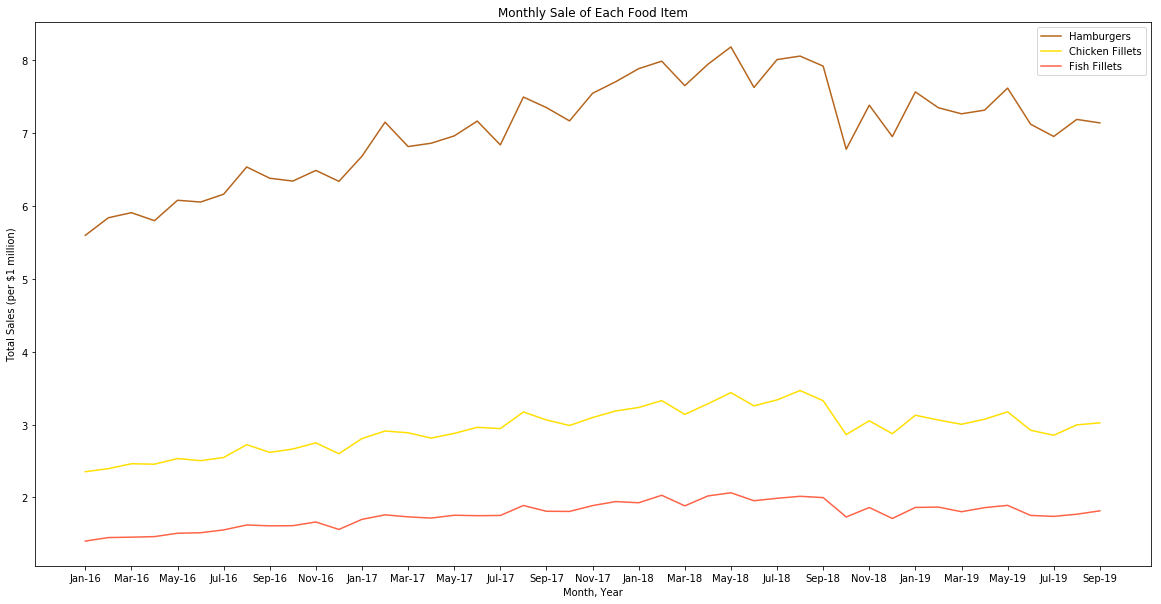

In [88]:
# a chart showing how sales of each food item has changed each month from Jan '16 to now (combine all regions)

tot_hamburgers = month[['HM-NE', 'HM-SW', 'HM-NW', 'HM-SE', 'HM-C']].apply(np.sum, axis=1)
tot_chickenfillets = month[['CF-NE', 'CF-SW', 'CF-NW', 'CF-SE', 'CF-C']].apply(np.sum, axis=1)
tot_fishfillets = month[['FF-NE', 'FF-SW', 'FF-NW', 'FF-SE', 'FF-C']].apply(np.sum, axis=1)

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

hm = ax.plot(month.index, tot_hamburgers / 1000000, color = '#b5651d', label = 'Hamburgers')
cc = ax.plot(month.index, tot_chickenfillets / 1000000, color = '#ffdf00', label = 'Chicken Fillets')
ff = ax.plot(month.index, tot_fishfillets / 1000000, color = '#FF6347', label = 'Fish Fillets')

plt.xticks(np.arange(0, 46, 2), month_labels)

plt.title("Monthly Sale of Each Food Item")
plt.xlabel("Month, Year")
plt.ylabel("Total Sales (per $1 million)")

plt.legend()

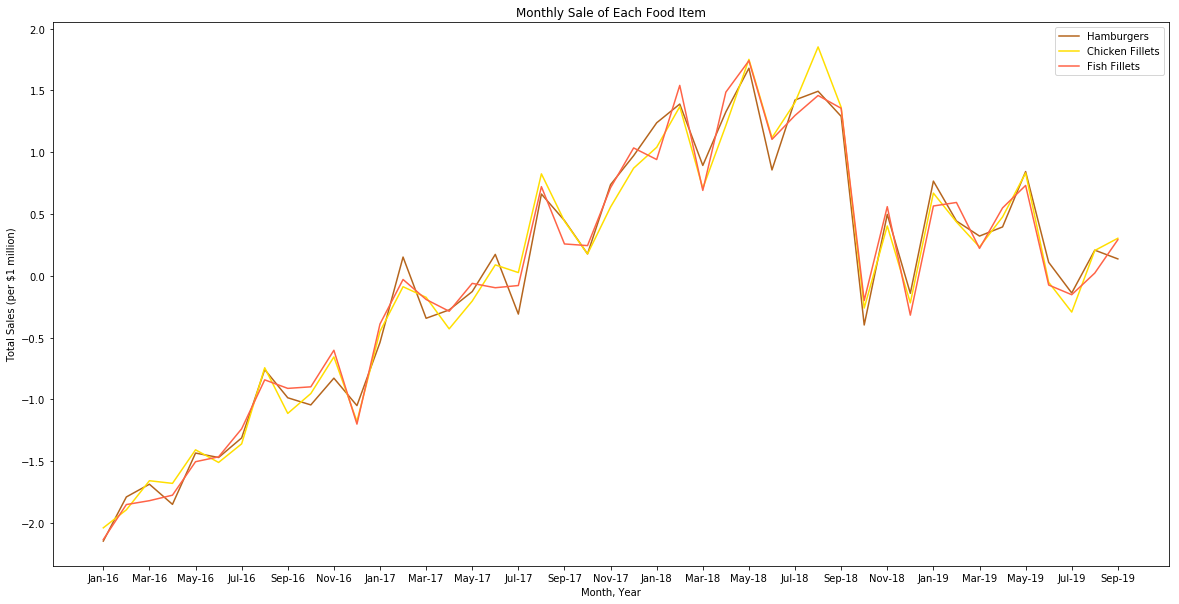

In [89]:
#same plot as above, but normalized (z-score)

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(month.index, stats.zscore(tot_hamburgers / 1000000), color = '#b5651d', label = 'Hamburgers')
plt.plot(month.index, stats.zscore(tot_chickenfillets / 1000000), color = '#ffdf00', label = 'Chicken Fillets')
plt.plot(month.index, stats.zscore(tot_fishfillets / 1000000), color = '#FF6347', label = 'Fish Fillets')

plt.xticks(np.arange(0, 46, 2), month_labels)

plt.title("Monthly Sale of Each Food Item")
plt.xlabel("Month, Year")
plt.ylabel("Total Sales (per $1 million)")

plt.legend()

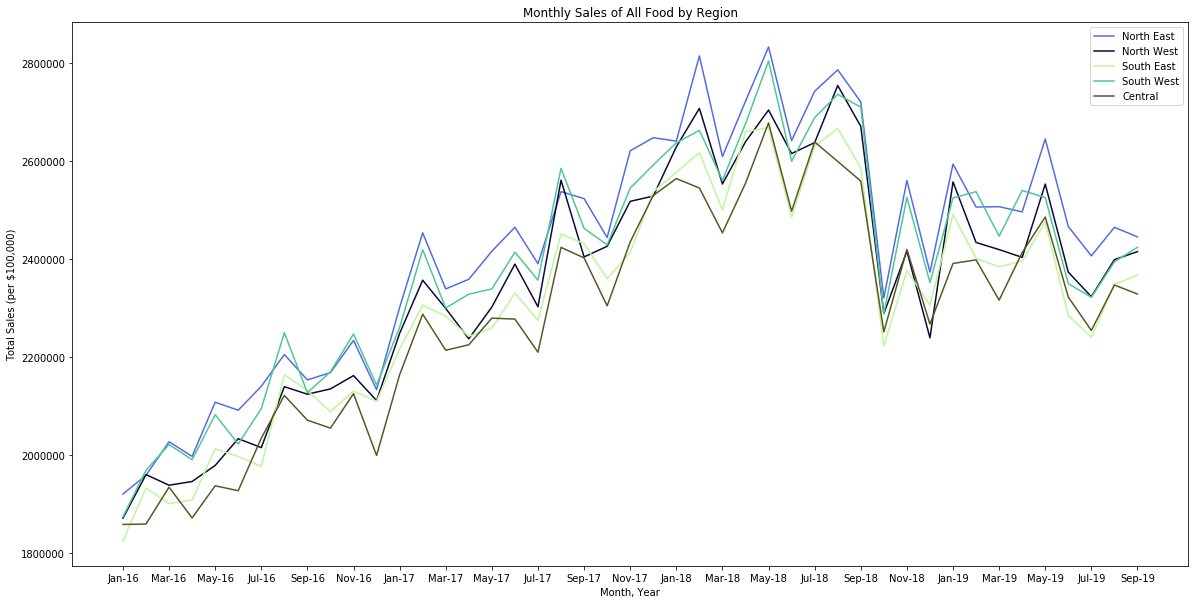

In [91]:
# chart showing how sales of all foods combined have changed overtime for each region
tot_ne = month[['HM-NE', 'CF-NE', 'FF-NE']].apply(np.sum, axis=1)
tot_nw = month[['HM-NW', 'CF-NW', 'FF-NW']].apply(np.sum, axis=1)
tot_se = month[['HM-SE', 'CF-SE', 'FF-SE']].apply(np.sum, axis=1)
tot_sw = month[['HM-SW', 'CF-SW', 'FF-SW']].apply(np.sum, axis=1)
tot_c = month[['HM-C', 'CF-C', 'FF-C']].apply(np.sum, axis=1)

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(month.index, tot_ne, color = '#536be2', label = 'North East')
plt.plot(month.index, tot_nw, color = '#0a0737', label = 'North West')
plt.plot(month.index, tot_se, color = '#bcf79c', label = 'South East')
plt.plot(month.index, tot_sw, color = '#4dc794', label = 'South West')
plt.plot(month.index, tot_c, color = '#5a5522', label = 'Central')

plt.xticks(np.arange(0, 46, 2), month_labels)

plt.title("Monthly Sales of All Food by Region")
plt.xlabel("Month, Year")
plt.ylabel("Total Sales (per $100,000)")

plt.legend()

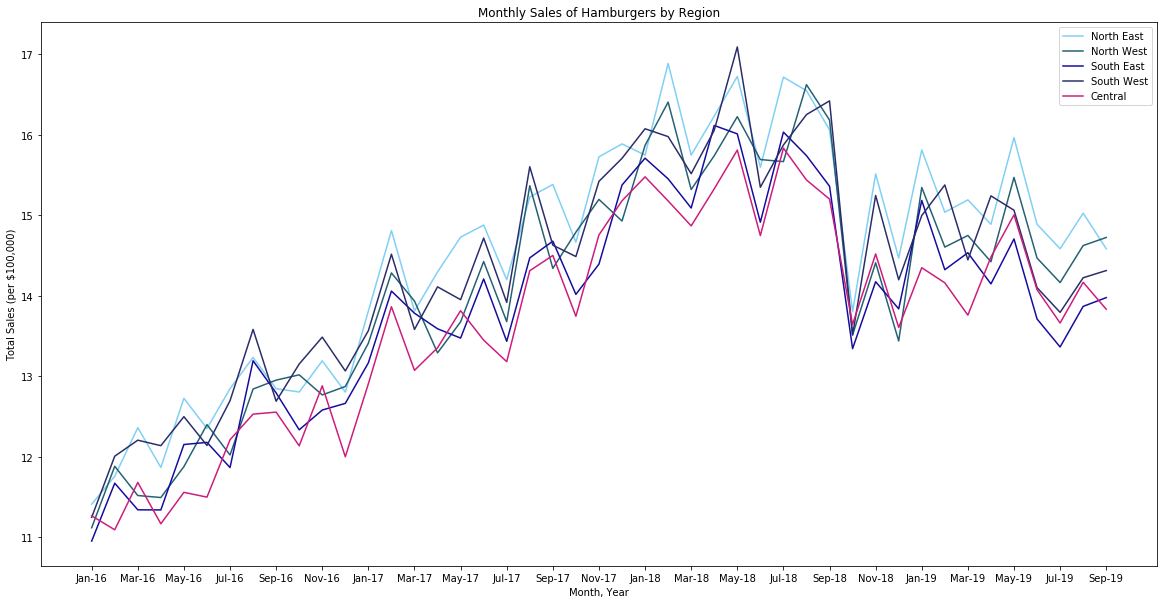

In [94]:
# a chart showing how sales of hamburgers have changed over time for each region

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(month.index, month['HM-NE'] / 100000, color = '#80d0f4', label = 'North East')
plt.plot(month.index, month['HM-NW'] / 100000, color = '#236173', label = 'North West')
plt.plot(month.index, month['HM-SE'] / 100000, color = '#150b9f', label = 'South East')
plt.plot(month.index, month['HM-SW'] / 100000, color = '#2a2d69', label = 'South West')
plt.plot(month.index, month['HM-C'] / 100000, color = '#cd1c7b', label = 'Central')

plt.xticks(np.arange(0, 46, 2), month_labels)

plt.title("Monthly Sales of Hamburgers by Region")
plt.xlabel("Month, Year")
plt.ylabel("Total Sales (per $100,000)")

plt.legend()

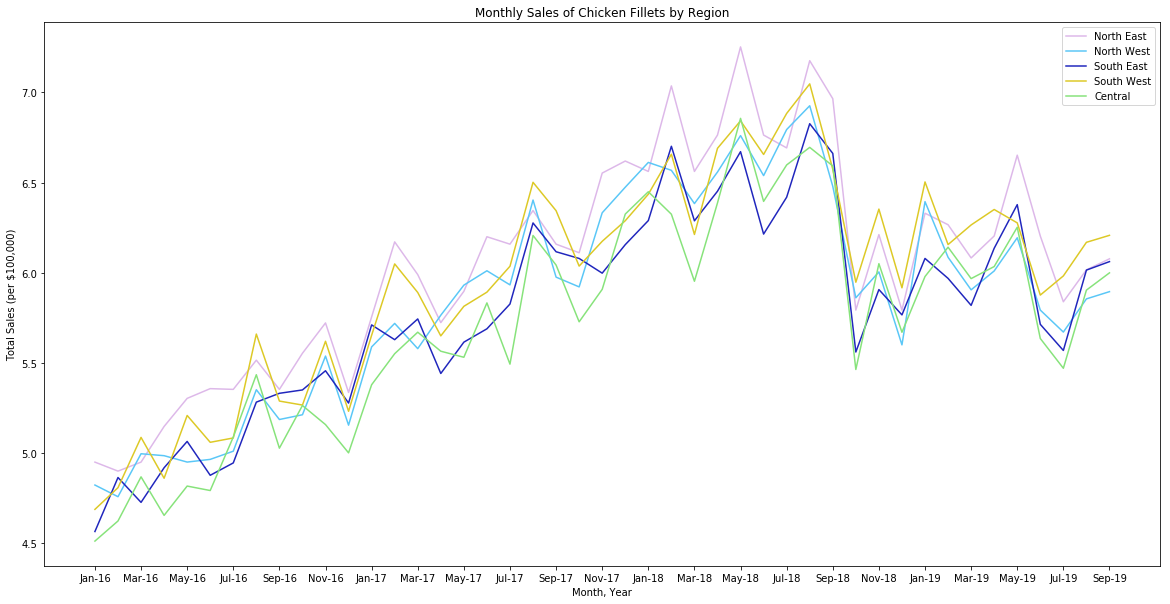

In [98]:
# a chart showing how sales of chicken fillet have changed over time for each region

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(month.index, month['CF-NE'] / 100000, color = '#ddb8e9', label = 'North East')
plt.plot(month.index, month['CF-NW'] / 100000, color = '#5ac7f7', label = 'North West')
plt.plot(month.index, month['CF-SE'] / 100000, color = '#2026bd', label = 'South East')
plt.plot(month.index, month['CF-SW'] / 100000, color = '#ddc926', label = 'South West')
plt.plot(month.index, month['CF-C'] / 100000, color = '#87e37b', label = 'Central')

plt.xticks(np.arange(0, 46, 2), month_labels)

plt.title("Monthly Sales of Chicken Fillets by Region")
plt.xlabel("Month, Year")
plt.ylabel("Total Sales (per $100,000)")

plt.legend()

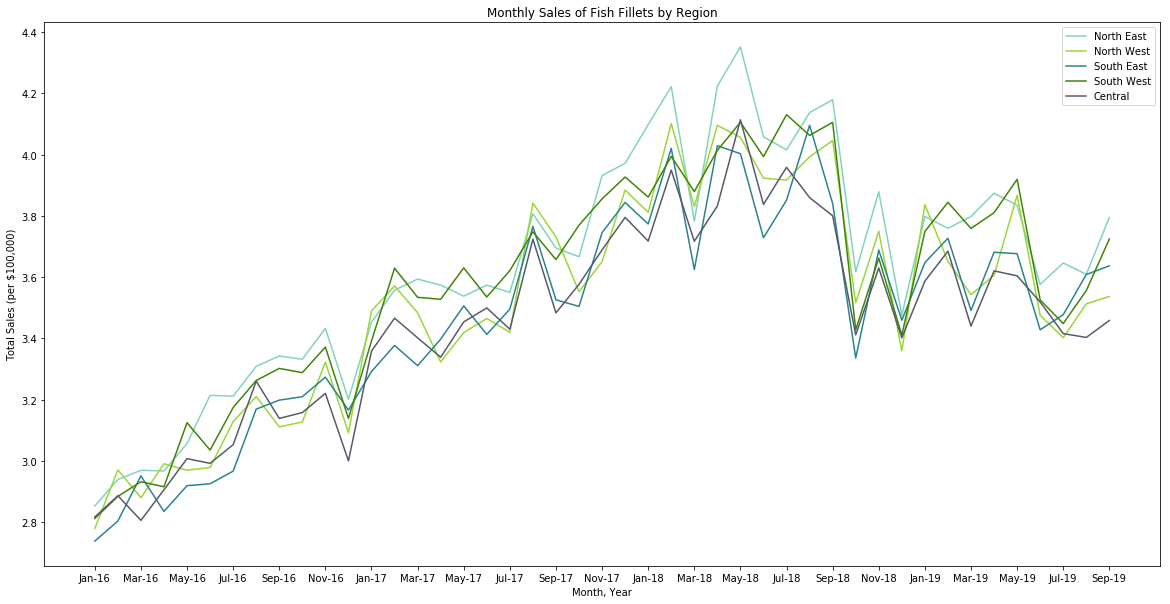

In [99]:
# a chart showing how sales of fish fillet have changed over time for each region

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(month.index, month['FF-NE'] / 100000, color = '#81d3be', label = 'North East')
plt.plot(month.index, month['FF-NW'] / 100000, color = '#9ad639', label = 'North West')
plt.plot(month.index, month['FF-SE'] / 100000, color = '#29828f', label = 'South East')
plt.plot(month.index, month['FF-SW'] / 100000, color = '#3f8307', label = 'South West')
plt.plot(month.index, month['FF-C'] / 100000, color = '#55596a', label = 'Central')

plt.xticks(np.arange(0, 46, 2), month_labels)

plt.title("Monthly Sales of Fish Fillets by Region")
plt.xlabel("Month, Year")
plt.ylabel("Total Sales (per $100,000)")

plt.legend()

#### Let's look for trends in the daily data:

In [129]:
# create x-axis labels by selecting only certain months
day_labels = [daily['Day'].iloc[i] for i in daily.index if i%2 == 0]

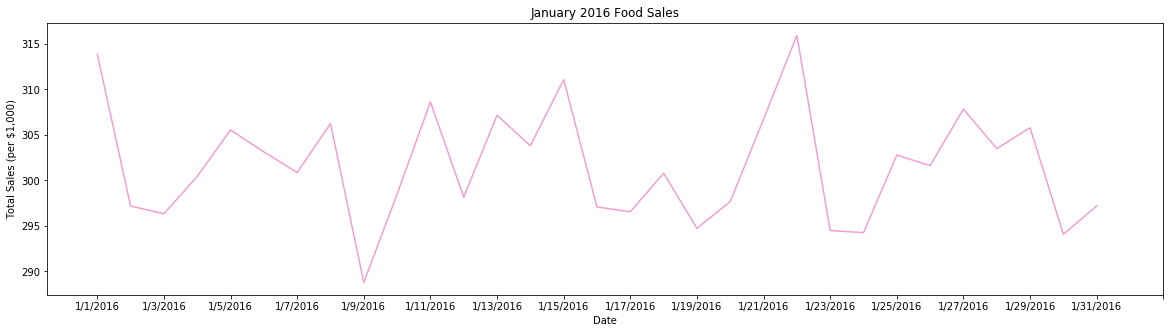

In [132]:
# plot each food item over the month (shouldn't expect to see anything interesting here)

tot_sales = daily.iloc[:, 2:].apply(np.sum, axis = 1)

fig = plt.figure(figsize=(20, 5))
ax = plt.axes()

plt.plot(daily.index, tot_sales / 1000, color = '#f09fd1')

plt.xticks(np.arange(0, 32, 2), day_labels)

plt.title("January 2016 Food Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales (per $1,000)")

In [ ]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

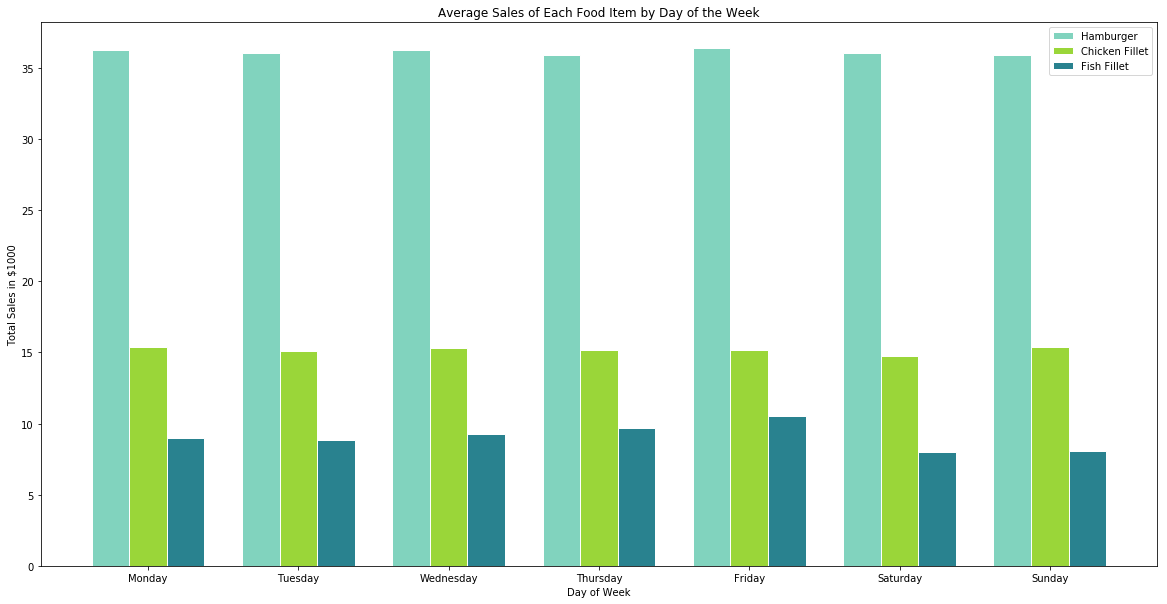

In [62]:
# Average of each regions sales for each food item by Day of Week

# each food item by day of the week

jan_hm = daily[['Unnamed: 0', 'HM-NE', 'HM-SW', 'HM-NW', 'HM-SE', 'HM-C']].groupby('Unnamed: 0').mean().apply(np.mean, axis = 1).reindex(week_days)
jan_cf = daily[['Unnamed: 0', 'CF-NE', 'CF-SW', 'CF-NW', 'CF-SE', 'CF-C']].groupby('Unnamed: 0').mean().apply(np.mean, axis = 1).reindex(week_days)
jan_ff = daily[['Unnamed: 0', 'FF-NE', 'FF-SW', 'FF-NW', 'FF-SE', 'FF-C']].groupby('Unnamed: 0').mean().apply(np.mean, axis = 1).reindex(week_days)

# set width of bar
barWidth = 0.25

# Set position of bar on X axis
hm = np.arange(len(jan_hm))
cf = [x + barWidth for x in r1]
ff = [x + barWidth for x in r2]

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.bar(hm, jan_hm / 1000, color='#81d3be', width=barWidth, edgecolor='white', label='Hamburger')
plt.bar(cf, jan_cf / 1000, color='#9ad639', width=barWidth, edgecolor='white', label='Chicken Fillet')
plt.bar(ff, jan_ff / 1000, color='#29828f', width=barWidth, edgecolor='white', label='Fish Fillet')

plt.title("Average Sales of Each Food Item by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales in $1000")

# Add xticks on the middle of the group bars
plt.xlabel('Day of Week')
plt.xticks([r + barWidth for r in range(len(jan_hm))], week_days)

plt.legend()

In [49]:
daily[daily['Unnamed: 0'] == 'Monday'].iloc[:, 2:]

,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
3,37590,16413,9537,33666,15114,8429,37993,14535,8034,36601,14528,8201,36168,15699,7940
10,36893,16771,10091,35750,16565,9506,37802,15222,8566,34769,15528,9312,37905,14909,9037
17,35629,15691,8441,37242,16313,9602,36945,14479,9107,34210,13589,8793,36938,14565,9250
24,37295,16769,9068,33006,16468,9428,36311,17134,8892,35061,13521,8545,37700,14362,9227


Text(0,0.5,'Total Sales')

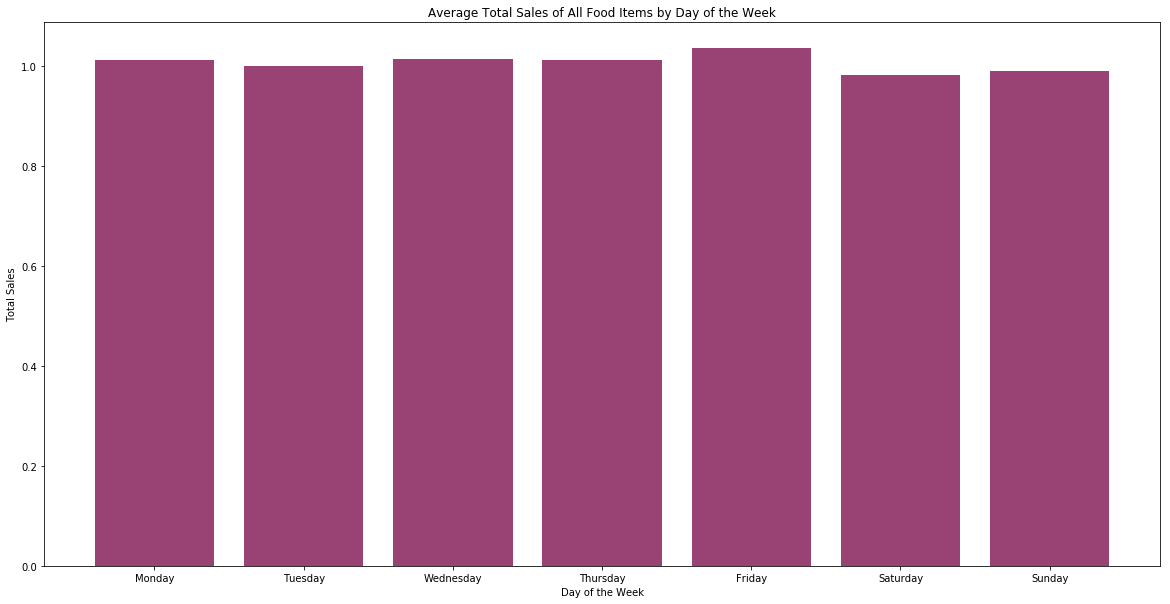

In [59]:
# Average food sales in Jan 2016 by day of week with error bars

avg_mon = daily[daily['Unnamed: 0'] == 'Monday'].iloc[:, 2:].values.mean() / 20000
avg_tue = daily[daily['Unnamed: 0'] == 'Tuesday'].iloc[:, 2:].values.mean() / 20000
avg_wed = daily[daily['Unnamed: 0'] == 'Wednesday'].iloc[:, 2:].values.mean() / 20000
avg_thu = daily[daily['Unnamed: 0'] == 'Thursday'].iloc[:, 2:].values.mean()  / 20000
avg_fri = daily[daily['Unnamed: 0'] == 'Friday'].iloc[:, 2:].values.mean()  / 20000
avg_sat = daily[daily['Unnamed: 0'] == 'Saturday'].iloc[:, 2:].values.mean() / 20000
avg_sun = daily[daily['Unnamed: 0'] == 'Sunday'].iloc[:, 2:].values.mean() / 20000

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.bar(week_days, [avg_mon, avg_tue, avg_wed, avg_thu, avg_fri, avg_sat, avg_sun], color='#994374')

plt.title("Average Total Sales of All Food Items by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")

In [58]:
daily[daily['Unnamed: 0'] == 'Monday'].iloc[:, 2:].values.sum()


1212655

In [61]:
daily_total = sum()

9350979

Text(0,0.5,'Total Sales in $10000')

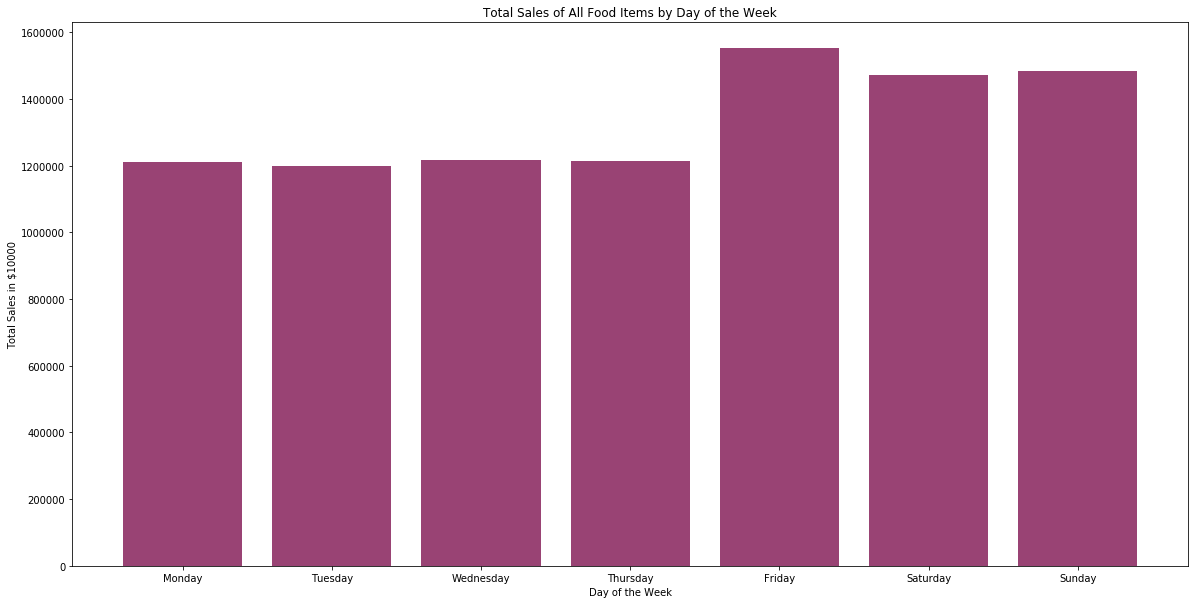

In [60]:
#THIS IS NOT A GOOD WAY TO VISUALIZE THE DATA (WITH SUMS) BC THERE ARE 4 FRI, SAT, AND SUN IN JAN 2016 AND ONLY 3 OF THE OTHER DAYS OF THE WEEK!!!

# Total food sales in Jan 2016 by Day of Week

tot_mon = daily[daily['Unnamed: 0'] == 'Monday'].iloc[:, 2:].values.sum() #/ sum([mon, tue, wed, thu, fri, sat, sun])
tot_tue = daily[daily['Unnamed: 0'] == 'Tuesday'].iloc[:, 2:].values.sum() #/ sum([mon, tue, wed, thu, fri, sat, sun])
tot_wed = daily[daily['Unnamed: 0'] == 'Wednesday'].iloc[:, 2:].values.sum() #/ sum([mon, tue, wed, thu, fri, sat, sun])
tot_thu = daily[daily['Unnamed: 0'] == 'Thursday'].iloc[:, 2:].values.sum() #/ sum([mon, tue, wed, thu, fri, sat, sun])
tot_fri = daily[daily['Unnamed: 0'] == 'Friday'].iloc[:, 2:].values.sum()# / sum([mon, tue, wed, thu, fri, sat, sun])
tot_sat = daily[daily['Unnamed: 0'] == 'Saturday'].iloc[:, 2:].values.sum() #/ sum([mon, tue, wed, thu, fri, sat, sun])
tot_sun = daily[daily['Unnamed: 0'] == 'Sunday'].iloc[:, 2:].values.sum() #/ sum([mon, tue, wed, thu, fri, sat, sun])

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.bar(week_days, [tot_mon, tot_tue, tot_wed, tot_thu, tot_fri, tot_sat, tot_sun], color='#994374')

plt.title("Total Sales of All Food Items by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales in $10000")

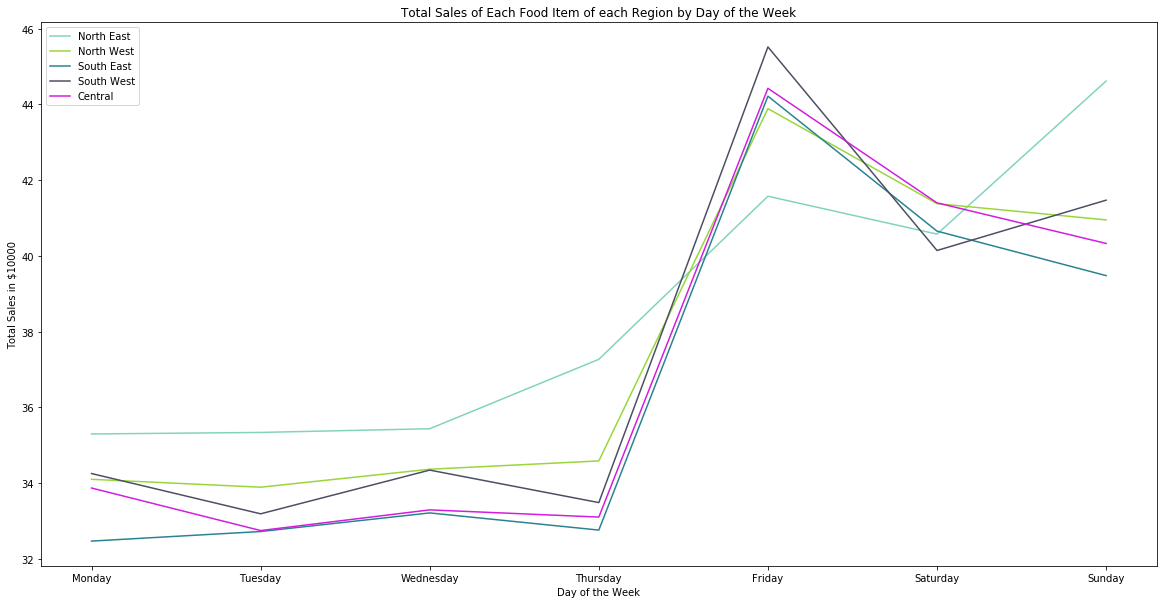

In [32]:
#  each region's total food sales by day of week

jan_ne = daily[['Unnamed: 0', 'HM-NE', 'CF-NE', 'FF-NE', 'CF-NE', 'FF-NE']].groupby('Unnamed: 0').sum().apply(np.sum, axis = 1)
jan_nw = daily[['Unnamed: 0', 'HM-NW', 'CF-NW', 'FF-NW', 'CF-NW', 'FF-NW']].groupby('Unnamed: 0').sum().apply(np.sum, axis = 1)
jan_se = daily[['Unnamed: 0', 'HM-SE', 'CF-SE', 'FF-SE', 'CF-SE', 'FF-SE']].groupby('Unnamed: 0').sum().apply(np.sum, axis = 1)
jan_sw = daily[['Unnamed: 0', 'HM-SW', 'CF-SW', 'FF-SW', 'CF-SW', 'FF-SW']].groupby('Unnamed: 0').sum().apply(np.sum, axis = 1)
jan_c = daily[['Unnamed: 0', 'HM-C', 'CF-C', 'FF-C', 'CF-C', 'FF-C']].groupby('Unnamed: 0').sum().apply(np.sum, axis = 1)

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(week_days, jan_ne.reindex(week_days) / 10000, color = '#81d3be', label = 'North East')
plt.plot(week_days, jan_nw.reindex(week_days) / 10000, color = '#9ad639', label = 'North West')
plt.plot(week_days, jan_se.reindex(week_days) / 10000, color = '#29828f', label = 'South East')
plt.plot(week_days, jan_sw.reindex(week_days) / 10000, color = '#4a4f63', label = 'South West')
plt.plot(week_days, jan_c.reindex(week_days) / 10000, color = '#d21cdf', label = 'Central')

plt.title("Total Sales of Each Food Item of each Region by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales in $10000")

plt.legend()

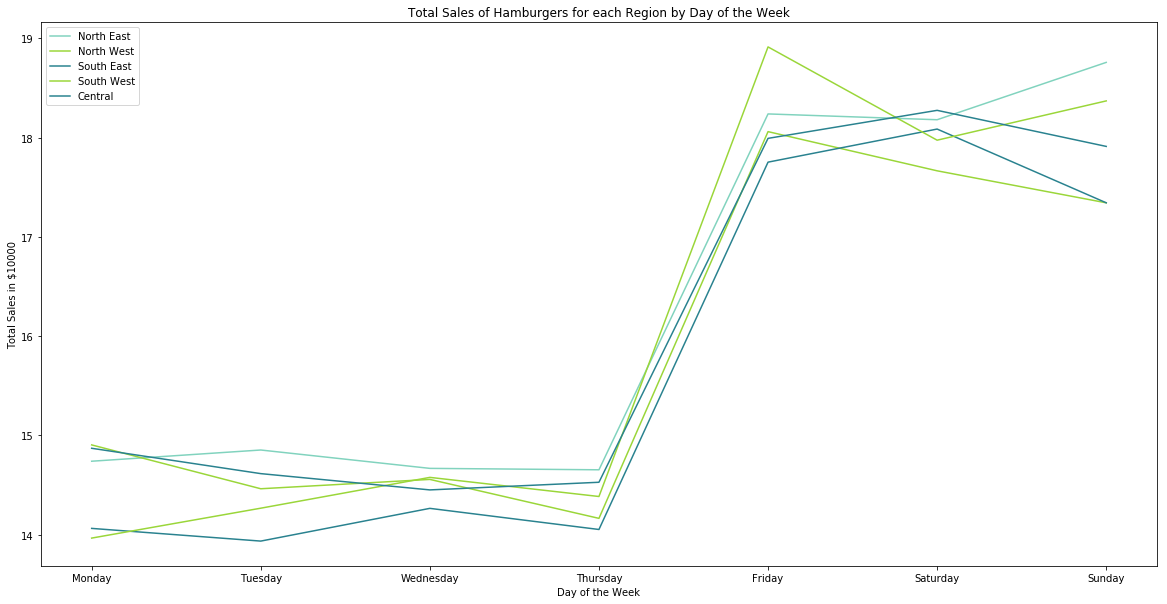

In [161]:
# hamburger sales for each region by day of the week

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(week_days, daily[['Unnamed: 0', 'HM-NE']].groupby('Unnamed: 0').sum().reindex(week_days) / 10000, 
         color = '#81d3be', label = 'North East')
plt.plot(week_days, daily[['Unnamed: 0', 'HM-NW']].groupby('Unnamed: 0').sum().reindex(week_days) / 10000, 
         color = '#9ad639', label = 'North West')
plt.plot(week_days, daily[['Unnamed: 0', 'HM-SE']].groupby('Unnamed: 0').sum().reindex(week_days) / 10000, 
         color = '#29828f', label = 'South East')
plt.plot(week_days, daily[['Unnamed: 0', 'HM-SW']].groupby('Unnamed: 0').sum().reindex(week_days) / 10000, 
         color = '#9ad639', label = 'South West')
plt.plot(week_days, daily[['Unnamed: 0', 'HM-C']].groupby('Unnamed: 0').sum().reindex(week_days) / 10000, 
         color = '#29828f', label = 'Central')

plt.title("Total Sales of Hamburgers for each Region by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales in $10000")

plt.legend()

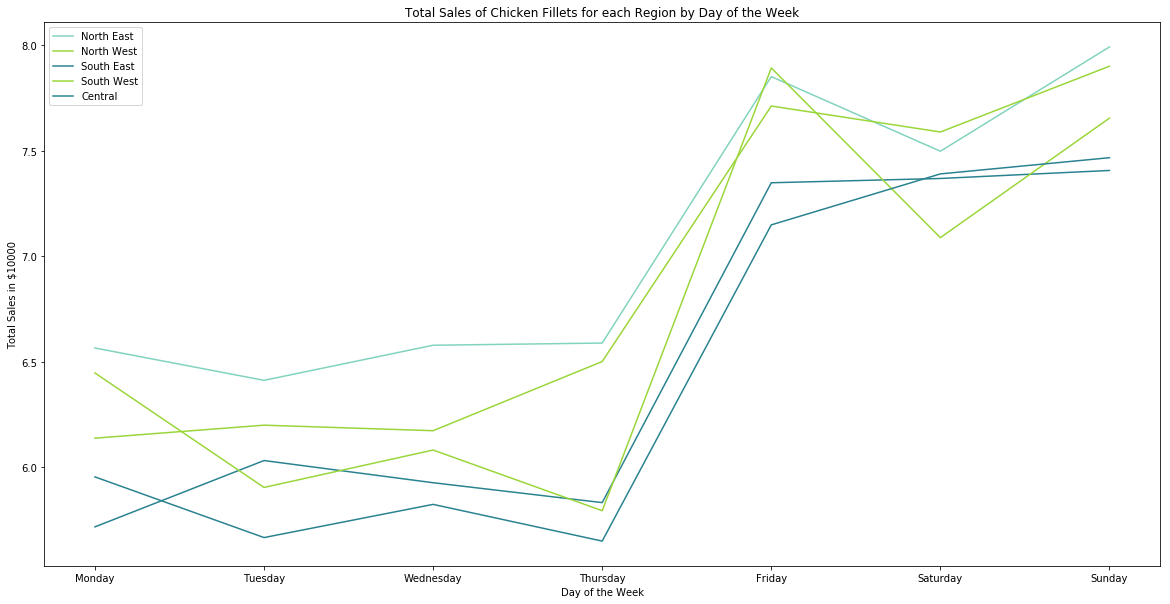

In [162]:
# chicken fillet sales for each region by day of the week

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(week_days, daily[['Unnamed: 0', 'CF-NE']].groupby('Unnamed: 0').sum().reindex(week_days) / 10000, 
         color = '#81d3be', label = 'North East')
plt.plot(week_days, daily[['Unnamed: 0', 'CF-NW']].groupby('Unnamed: 0').sum().reindex(week_days) / 10000, 
         color = '#9ad639', label = 'North West')
plt.plot(week_days, daily[['Unnamed: 0', 'CF-SE']].groupby('Unnamed: 0').sum().reindex(week_days) / 10000, 
         color = '#29828f', label = 'South East')
plt.plot(week_days, daily[['Unnamed: 0', 'CF-SW']].groupby('Unnamed: 0').sum().reindex(week_days) / 10000, 
         color = '#9ad639', label = 'South West')
plt.plot(week_days, daily[['Unnamed: 0', 'CF-C']].groupby('Unnamed: 0').sum().reindex(week_days) / 10000, 
         color = '#29828f', label = 'Central')

plt.title("Total Sales of Chicken Fillets for each Region by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales in $10000")

plt.legend()

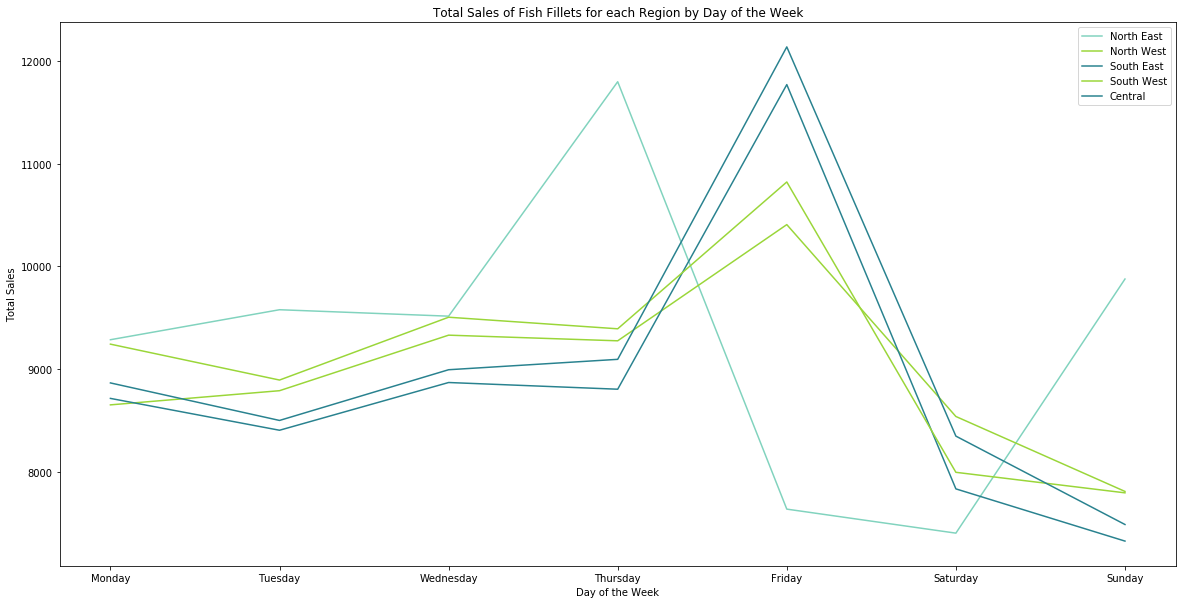

In [64]:
# fish fillet sales for each region by day of the week

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(week_days, daily[['Unnamed: 0', 'FF-NE']].groupby('Unnamed: 0').mean().reindex(week_days) , 
         color = '#81d3be', label = 'North East')
plt.plot(week_days, daily[['Unnamed: 0', 'FF-NW']].groupby('Unnamed: 0').mean().reindex(week_days) , 
         color = '#9ad639', label = 'North West')
plt.plot(week_days, daily[['Unnamed: 0', 'FF-SE']].groupby('Unnamed: 0').mean().reindex(week_days), 
         color = '#29828f', label = 'South East')
plt.plot(week_days, daily[['Unnamed: 0', 'FF-SW']].groupby('Unnamed: 0').mean().reindex(week_days) , 
         color = '#9ad639', label = 'South West')
plt.plot(week_days, daily[['Unnamed: 0', 'FF-C']].groupby('Unnamed: 0').mean().reindex(week_days), 
         color = '#29828f', label = 'Central')

plt.title("Total Sales of Fish Fillets for each Region by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")

plt.legend()

#### After noticing the disparity in fish fillet sales, and odd behavior in the North East overall, lets take a closer look.

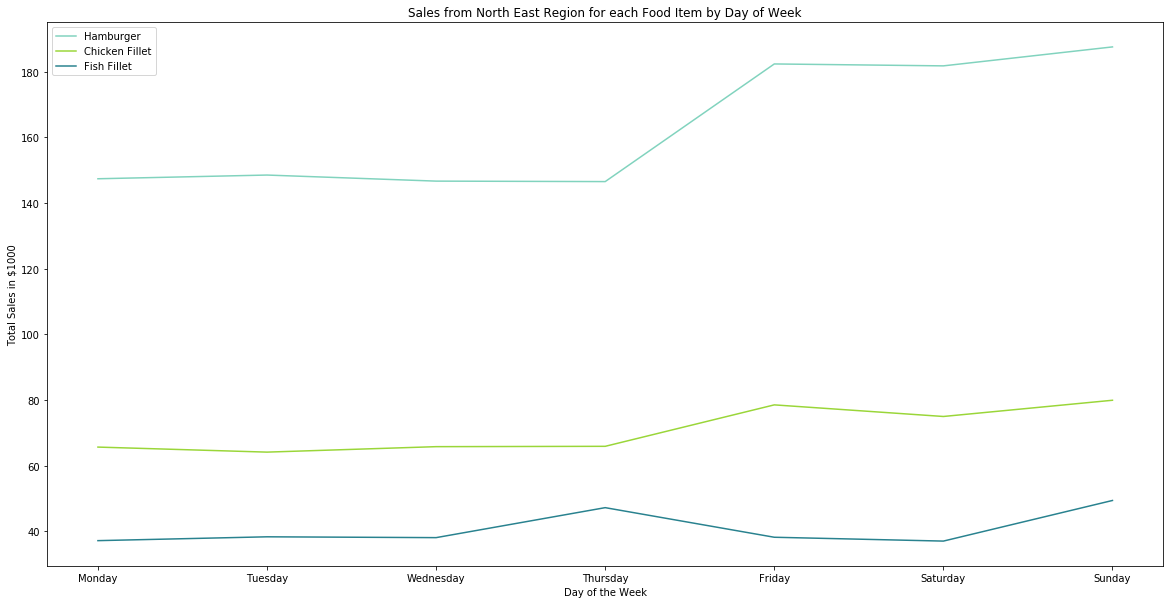

In [165]:
# sales for North East for each food item by Day of Week
fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(week_days, daily[['Unnamed: 0', 'HM-NE']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#81d3be', label = 'Hamburger')
plt.plot(week_days, daily[['Unnamed: 0', 'CF-NE']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#9ad639', label = 'Chicken Fillet')
plt.plot(week_days, daily[['Unnamed: 0', 'FF-NE']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#29828f', label = 'Fish Fillet')

plt.title("Sales from North East Region for each Food Item by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales in $1000")

plt.legend()

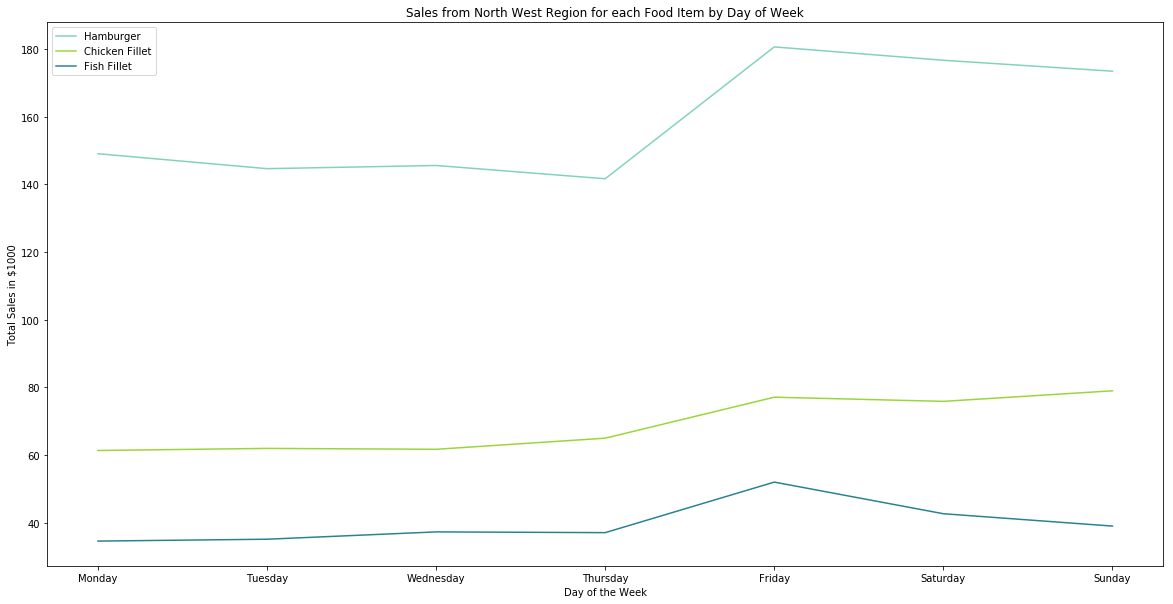

In [173]:
# sales for North West for each food item by Day of Week

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(week_days, daily[['Unnamed: 0', 'HM-NW']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#81d3be', label = 'Hamburger')
plt.plot(week_days, daily[['Unnamed: 0', 'CF-NW']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#9ad639', label = 'Chicken Fillet')
plt.plot(week_days, daily[['Unnamed: 0', 'FF-NW']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#29828f', label = 'Fish Fillet')

plt.title("Sales from North West Region for each Food Item by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales in $1000")

plt.legend()

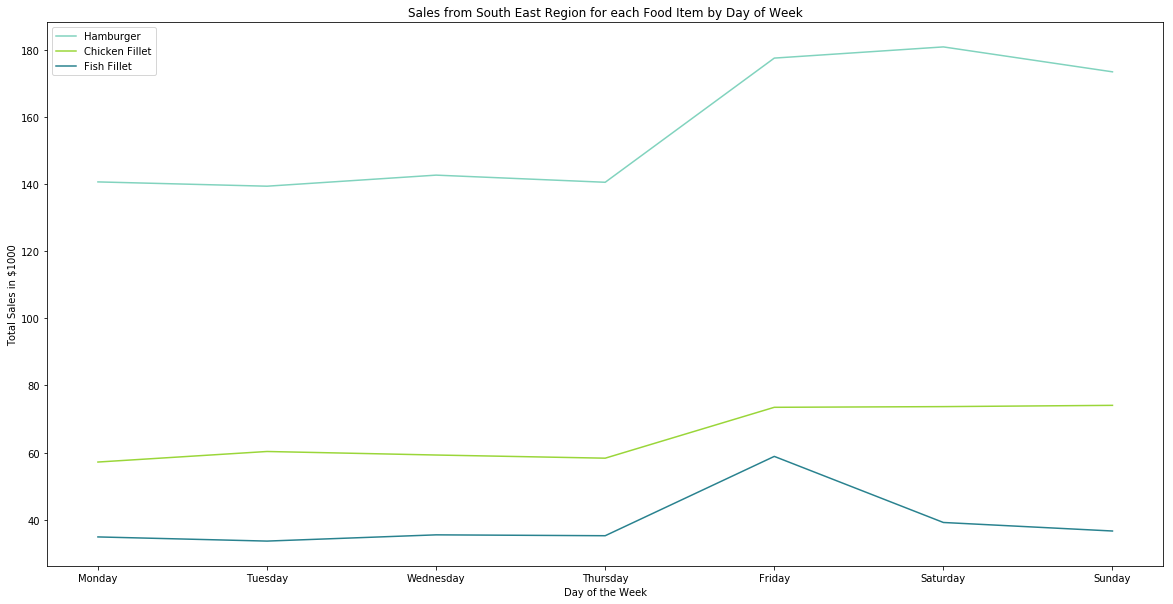

In [172]:
# sales for South East for each food item by Day of Week

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(week_days, daily[['Unnamed: 0', 'HM-SE']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#81d3be', label = 'Hamburger')
plt.plot(week_days, daily[['Unnamed: 0', 'CF-SE']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#9ad639', label = 'Chicken Fillet')
plt.plot(week_days, daily[['Unnamed: 0', 'FF-SE']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#29828f', label = 'Fish Fillet')

plt.title("Sales from South East Region for each Food Item by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales in $1000")

plt.legend()

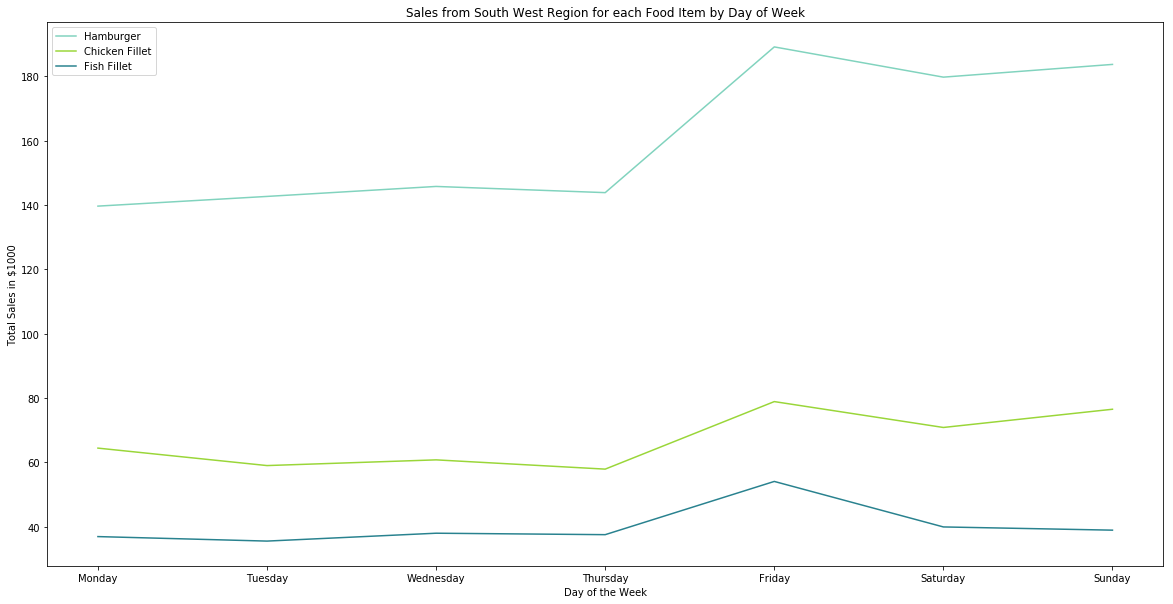

In [171]:
# sales for South West for each food item by Day of Week

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(week_days, daily[['Unnamed: 0', 'HM-SW']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#81d3be', label = 'Hamburger')
plt.plot(week_days, daily[['Unnamed: 0', 'CF-SW']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#9ad639', label = 'Chicken Fillet')
plt.plot(week_days, daily[['Unnamed: 0', 'FF-SW']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#29828f', label = 'Fish Fillet')

plt.title("Sales from South West Region for each Food Item by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales in $1000")

plt.legend()

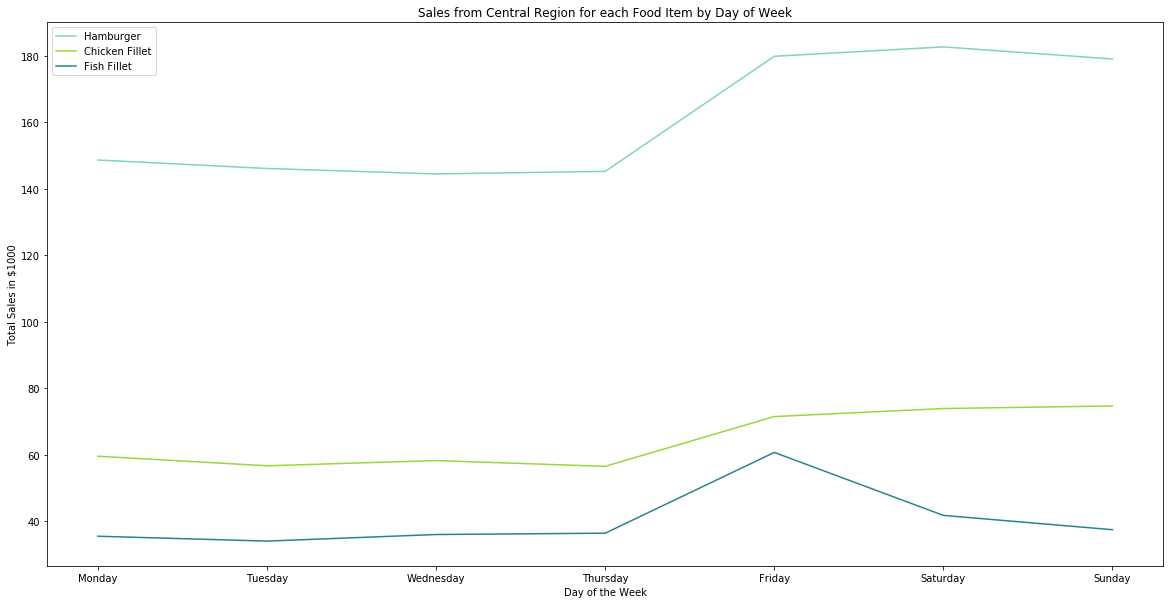

In [170]:
# sales for Central for each food item by Day of Week

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()

plt.plot(week_days, daily[['Unnamed: 0', 'HM-C']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#81d3be', label = 'Hamburger')
plt.plot(week_days, daily[['Unnamed: 0', 'CF-C']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#9ad639', label = 'Chicken Fillet')
plt.plot(week_days, daily[['Unnamed: 0', 'FF-C']].groupby('Unnamed: 0').sum().reindex(week_days) / 1000, 
         color = '#29828f', label = 'Fish Fillet')

plt.title("Sales from Central Region for each Food Item by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales in $1000")

plt.legend()

#### Looks like overall, sales tend to peak for most foods in most regions on Friday (except North East Fish Fillets), and then they usually go down by Sunday (North East grows on Sunday). But these estimates could be wrong, maybe the results will be different if I use np.mean instead of np.sum?

In [63]:
month

,"Month, Year",HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
0,Jan-16,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,1095034,456264,273758,1126476,450958,281619
1,Feb-16,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,1167009,486254,280311,1109076,462115,288586
2,Mar-16,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,1133899,472458,295045,1167894,486622,280523
3,Apr-16,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,1133767,491684,283441,1116560,465233,290533
4,May-16,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,1215080,506283,291857,1155612,481505,300695
5,Jun-16,1235025,535597,321358,1213908,505795,303477,1239785,496319,297791,1217717,487485,292491,1149673,479030,299149
6,Jul-16,1284426,535177,321106,1269486,508209,317371,1202069,500862,312783,1186438,494349,296609,1220954,508730,305238
7,Aug-16,1323348,551395,330837,1358134,565889,326218,1283993,534997,320998,1319163,528096,316857,1252825,543317,325990
8,Sep-16,1284426,535177,334213,1268860,528691,330162,1295077,518454,311072,1279199,532999,319799,1255322,502539,313830
9,Oct-16,1280303,555233,333140,1315120,526477,328780,1301675,521095,312657,1233342,534868,320920,1213425,526230,315738


In [ ]:
#Total food sales by region pie chart

In [ ]:
#Average food sales by region